In [21]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error

In [22]:
df = pd.read_csv("https://raw.githubusercontent.com/justmarkham/scikit-learn-videos/master/data/Advertising.csv")
df.drop(df.columns[0], axis=1, inplace=True)
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


<Axes: >

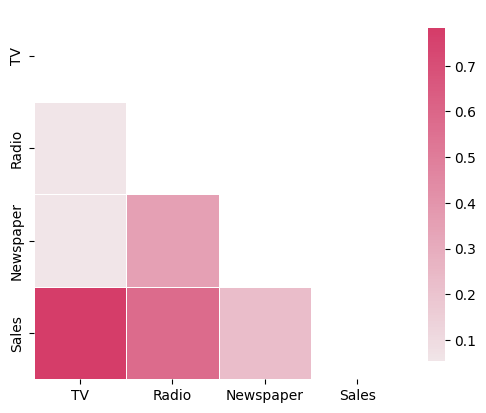

In [23]:
matrix = np.arange(1, 101).reshape(10, 10)
correlation_mat = df.corr()
mask = np.triu(np.ones_like(correlation_mat, dtype=bool), k=0)
cmap = sns.diverging_palette(255, 0, as_cmap=True)
sns.heatmap(
    correlation_mat,
    mask=mask,
    cmap=cmap,
    vmax=None,
    center=0,
    square=True,
    annot=False,
    linewidths=0.5,
    cbar_kws={"shrink": 0.9},
)

In [28]:
def plot_linear_regression(col):
    X, y = df[col].values.reshape(-1, 1), df['Sales']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LinearRegression()

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # plot_line
    plt.scatter(X_test, y_test)
    plt.plot(X_test, y_pred, color='red')
    plt.title(f'{col} v/s Sales')
    plt.xlabel(col)
    plt.ylabel("Sales")
    plt.show()

    print(f"coefficients :- {model.coef_}")
    print(f"intercept :- {model.intercept_}")

    print(f'error :- {mean_squared_error(y_test, y_pred)}')
    print(f'score :- {r2_score(y_test, y_pred)*100:.2f}')


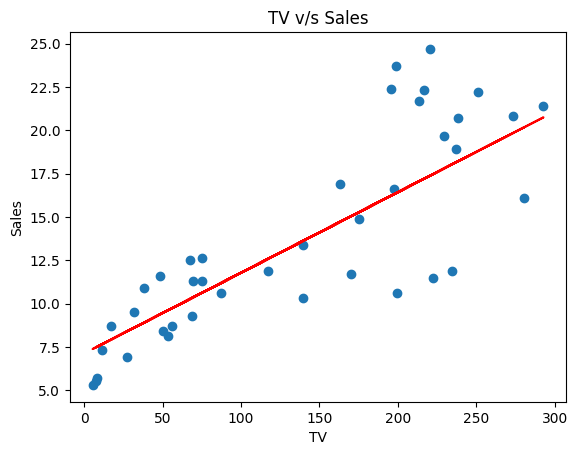

coefficients :- [0.04652973]
intercept :- 7.119638430592953
error :- 10.204654118800956
score :- 67.67


In [29]:
# TV v/s Sales
plot_linear_regression('TV')

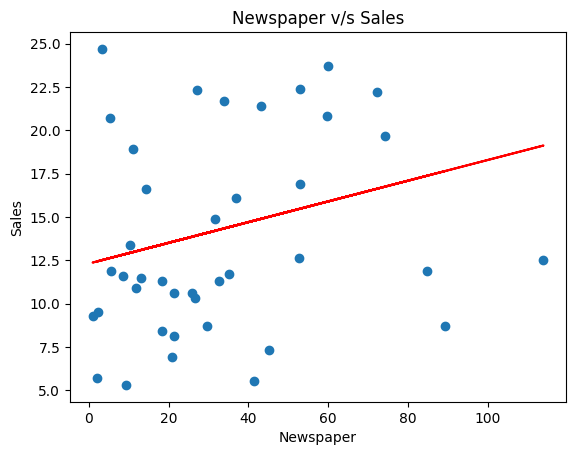

coefficients :- [0.0597567]
intercept :- 12.310548334039272
error :- 30.620733995242563
score :- 2.99


In [30]:
# Newspaper and sales
plot_linear_regression("Newspaper")

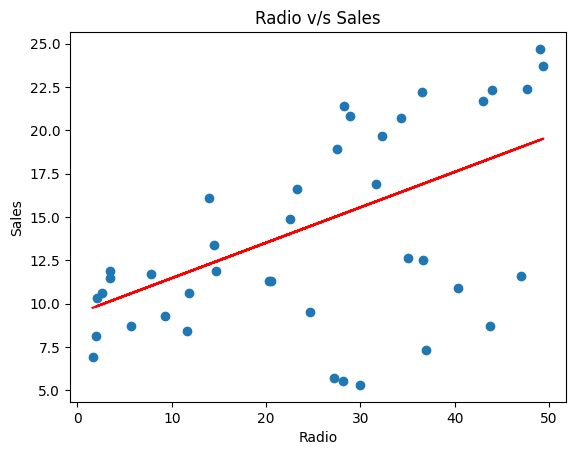

coefficients :- [0.20440685]
intercept :- 9.424065649663843
error :- 23.248766588129108
score :- 26.34


In [31]:
# Radio vs sales
plot_linear_regression('Radio')